<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">AG Dynamics of the Earth</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Jupyter notebooks</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
</tr>
</table>

# Numerical methods: 11. Finite differences
## Reaction equation in 1D
----
*Georg Kaufmann,
Geophysics Section,
Institute of Geological Sciences,
Freie Universität Berlin,
Germany*

----
In this notebook, we solve a simple **transient reaction equation** in one dimension,
using different numerical methods.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

The general advection-diffusion-reacton equation from the last part reads:
$$\fbox{$
\frac{\partial c}{\partial t}
= - v \frac{dc}{dx}
+ D \frac{d^2c}{dx^2}
+ R
$}$$

----
## Reaction

The simple one-dimensional `transient reaction equation` reads:
$$
\fbox{$
\frac{\partial c(x,t)}{\partial t} = R
$}
$$

As reaction $R$, we define radiogenic decay:
$$
c(t) = c_0 e^{\displaystyle -\lambda t}
$$
with
$t$ [s] time, $\lambda$ [1/s] the decay constant, and $c_0$ [mol/m$^3$] an initial concentration.

The reaction term $R$ is simply the temporal derivative of $c$:
$$
R = -\lambda c
$$

Then the transient reaction equation in 1D follows as:
$$
\frac{\partial c}{\partial t} = - \lambda c
$$

----
## Gaussian function

As initial condition, we again use the `Gaussian` function:
$$
c(x,t) = e^{-\frac{(x-vt-\mu)^2}{\sigma^2}}
$$
with mean $\mu$, standard deviation $\sigma$, and for completeness,
$v$ [m/s] the advection velocity.

In [2]:
def gaussian(x,v=0.,t=0.,mu=5.,sigma=1.):
    f = np.exp(-(x-v*t-mu)**2/(sigma)**2)
    return f

In [3]:
xstep = 101
x,dx = np.linspace(0,10,xstep,retstep=True)

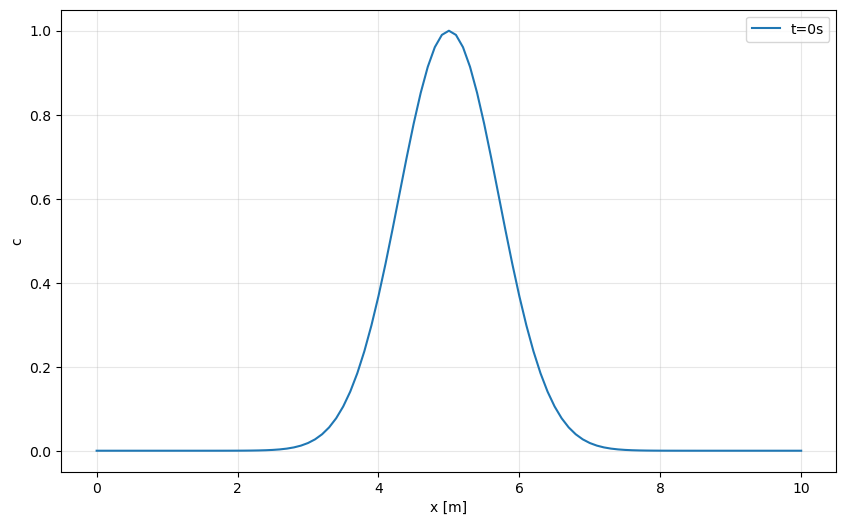

In [4]:
u0 = gaussian(x)

plt.figure(figsize=(10,6))
plt.xlabel('x [m]')
plt.ylabel('c')
plt.grid(alpha=0.3)
plt.plot(x,u0,label='t=0s')
#plt.plot(x,gaussian(x,t=4),label='t=4s')
#plt.plot(x,gaussian(x,t=8),label='t=8s')
#plt.plot(x,gaussian(x,t=10),label='t=10s')
plt.legend()

----
## Numerical solution methods

Next, we derive several numerical methods, which can be used to solve the transient advection equation.
We first need to assign the temporal and spatial time steps, $\Delta t$ [s] and $\Delta x$ [m], 
and the velocity $c$ [m/s]:

In [10]:
dt = 0.02   # s
thalf = 4    # s
lamb = np.log(2)/thalf
print(dt,thalf,lamb)

0.02 4 0.17328679513998632


Thus we have discretised both spatial and temporal variables:
$$
\begin{array}{rcl}
t_n &=& t_0 + n \Delta T, \quad n=0,N \\
x_i &=& x_0 + i \Delta x, \quad i=0,I
\end{array}
$$

The `Courant number`, defined as
$$
Co = \frac{v \Delta t}{\Delta x}
$$
defines the stability of the numerical solutions. Explicit solutions are stable
for $Co <1$.

In [15]:
v=1
Courant = v*dt/dx
print ('Courant number: ',Courant)

Courant number:  0.19999999999999998


In [12]:
time = np.arange(0,8,dt)

----
## FTCS scheme (forward time centered space)

Our first scheme is called `FTCS`, forward time, centered space, thus the derivatives in the
transient advection equations are replaced by **forward differences in time** and 
**central differences is space**:
$$
\frac{c_{i}^{n+1}-c_{i}^{n}}{\Delta t}
=
-\lambda c^n_i
$$
or solved for the next time step
$$
c_{i}^{n+1}
=
c_{i}^{n} - \lambda c^n_i \Delta t
$$

<img src="images/PDE_FTCS.jpg" style="height:5cm;">

We implement the FTCS method:

In [13]:
nt = time.shape[0]
nx = x.shape[0]
U = np.zeros(nt*nx).reshape(nx,nt)
u = np.zeros(nx)
print(U.shape)
# initial step
U[:,0] = gaussian(x)
# time iteration
for n in range(1,time.shape[0]):
    uold = U[:,n-1]
    for i in range(1,u.shape[0]-1):
        u[i] = uold[i] - lamb*uold[i]*dt
    U[:,n] = u

(101, 400)


[5.] [1.]
[5.] [0.70668126]
[5.] [0.4993984]
[5.] [0.35291549]


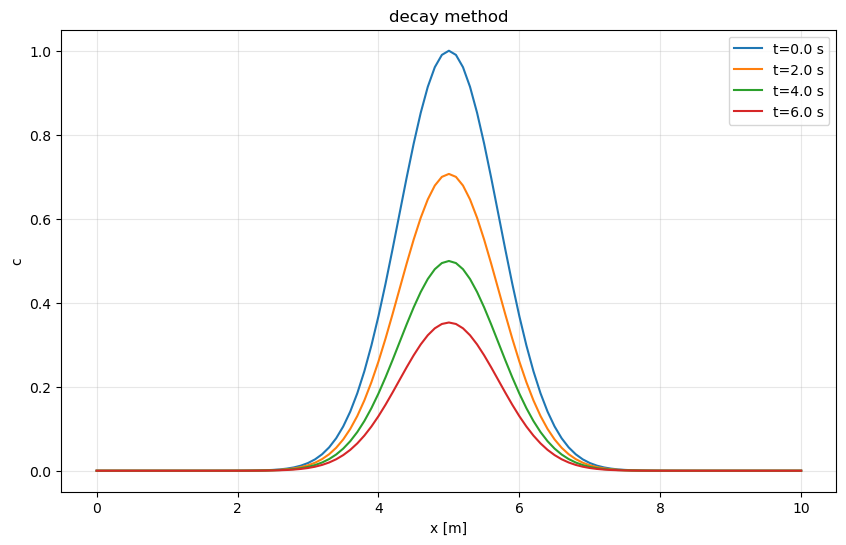

In [14]:
plt.figure(figsize=(10,6))
plt.xlabel('x [m]')
plt.ylabel('c')
plt.grid(alpha=0.3)
plt.title('decay method')
for j in range(0,U.shape[1],100):
    print(x[np.where(U[:,j] == np.amax(U[:,j]))],U[:,j][np.where(U[:,j] == np.amax(U[:,j]))])
    plt.plot(x,U[:,j],label='t='+str(round(time[j],1))+' s')
plt.legend()

... done